In [4]:
import tensorflow as tf


In [5]:
import numpy as np


In [6]:
import matplotlib.pyplot as plt


In [7]:
from scipy.stats import ortho_group

In [169]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1500, activation="relu"),
    tf.keras.layers.Dense(1500, activation="relu"), 
    tf.keras.layers.Dense(N * N),
    tf.keras.layers.Reshape([ N, N])
])

In [315]:
inp = tf.keras.layers.Input(shape=[N, N])
x = tf.keras.layers.Flatten()(inp)
x = tf.keras.layers.Dense(128, activation="relu")(x)
for _ in range(7):
    skip = x
    for _ in range(10):
        y = tf.keras.layers.Dense(256, activation="relu")(x)
        x = tf.keras.layers.concatenate([x, y])
    #x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dense(128,
        kernel_initializer=tf.keras.initializers.Zeros(),
        bias_initializer=tf.keras.initializers.Zeros()
    )(x)
    x = skip + x
    #x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(N * N)(x)
x = tf.keras.layers.Reshape([N, N])(x)
model2 = tf.keras.models.Model(inp, x)

In [316]:
model2.compile(loss="mean_squared_error", optimizer=tf.keras.optimizers.Adam(learning_rate=.00001))

In [ ]:
for _ in range(500):
    random_matrices = np.random.random((10000000, N, N)) * 4 - 2
    random_matrices = random_matrices[np.abs(np.linalg.det(random_matrices)) > .1]
    inverses = np.linalg.inv(random_matrices)
    inverses = inverses / 5.  
    model2.fit(random_matrices, inverses, epochs=1, batch_size=1024)

1253/9441 [==>...........................] - ETA: 3:46 - loss: 0.0358

In [318]:
np.sum(np.linalg.det(random_matrices) > .01)

4834350

In [319]:
zz = model2.predict(random_matrices[:10000])

In [320]:
inverses.shape

(9666694, 3, 3)

In [321]:
zz.shape

(10000, 3, 3)

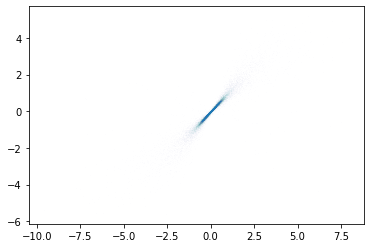

In [344]:
plt.scatter(inverses[:10000], zz, s=.00001)

In [324]:
np.linalg.det(random_matrices)

array([ 3.11392237,  8.25714148, -2.64452436, ...,  1.19683959,
       -1.53422139,  2.83938412])

In [326]:
random_matrices[76] @ zz[76] * 5

array([[ 1.02943672, -0.04236007, -0.16770406],
       [ 0.00608871,  0.96790134,  0.06936777],
       [-0.09907549, -0.11262596,  0.90522024]])

In [159]:
np.set_printoptions(suppress=True)

In [327]:
inverses[4850]

array([[ 0.06270969, -0.05428445, -0.00028689],
       [ 0.0785443 , -0.02910548,  0.1783052 ],
       [ 0.06735987,  0.05771256,  0.02694547]])

In [328]:
zz[4850]

array([[ 0.06713207, -0.03896927,  0.00326709],
       [ 0.06861734, -0.02461218,  0.18343331],
       [ 0.07803871,  0.08572729,  0.02131644]], dtype=float32)

In [238]:
np.argmin(np.abs(np.linalg.det(random_matrices)))

48056

In [329]:
model2.summary()

Model: "model_14"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_16 (InputLayer)           [(None, 3, 3)]       0                                            
__________________________________________________________________________________________________
flatten_29 (Flatten)            (None, 9)            0           input_16[0][0]                   
__________________________________________________________________________________________________
dense_485 (Dense)               (None, 128)          1280        flatten_29[0][0]                 
__________________________________________________________________________________________________
dense_486 (Dense)               (None, 256)          33024       dense_485[0][0]                  
___________________________________________________________________________________________

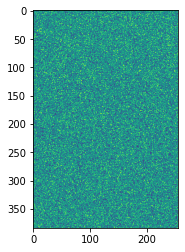

In [341]:
plt.imshow(model2.layers[49].weights[0].numpy())

In [ ]:
len